# Final Project: Rating Analysis And Prediction For Books

### By : Anusha Voloju, Maleeha Ahmed, Priyan Sureshkumar

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

import csv
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import contingency_matrix, adjusted_rand_score, silhouette_score, homogeneity_score ,completeness_score
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

## Data Collection

In [2]:
# read the dataset
data_publishers = pd.read_csv("publishers.csv")
data_publishers.head(10)

,genre,sold by,daily average.amazon revenue,daily average.author revenue,daily average.gross sales,daily average.publisher revenue,daily average.units sold,publisher.name,publisher.type,statistics.average rating,statistics.sale price,statistics.sales rank,statistics.total reviews
0,genre fiction,HarperCollins Publishers,6832.000,6832.000,34160.00,20496.000,7000,Katherine Tegen Books,big five,4.57,4.88,1,9604
1,genre fiction,HarperCollins Publishers,2487.500,2487.500,12437.50,7462.500,6250,HarperCollins e-books,big five,4.47,1.99,2,450
2,genre fiction,"Amazon Digital Services, Inc.",9559.000,9559.000,47795.00,28677.000,5500,(Small or Medium Publisher),small/medium,4.16,8.69,3,30
3,fiction,Hachette Book Group,8250.000,8250.000,41250.00,24750.000,5500,"Little, Brown and Company",big five,3.84,7.50,3,3747
4,genre fiction,Penguin Group (USA) LLC,7590.500,7590.500,37952.50,22771.500,4750,Dutton Children's,big five,4.75,7.99,4,9174
5,genre fiction,"Amazon Digital Services, Inc.",12974.000,6986.000,19960.00,0.000,4000,Thomas & Mercer,amazon,4.05,4.99,5,40
6,genre fiction,HarperCollins Publishers,5498.334,5498.334,27491.67,16495.002,3933,Katherine Tegen Books,big five,3.16,6.99,6,7026
7,nonfiction,Hachette Book Group,5236.400,5236.400,26182.00,15709.200,3800,Center Street,big five,4.31,6.89,8,369
8,genre fiction,HarperCollins Publishers,5218.734,5218.734,26093.67,15656.202,3733,Katherine Tegen Books,big five,4.58,6.99,9,5926
9,genre fiction,Random House LLC,4758.468,4758.468,23792.34,14275.404,3666,Doubleday,big five,4.52,6.49,10,7132


In [3]:
# structure of the dataframe(rows, columns)
data_publishers.shape

(27027, 13)

In [4]:
# information about each column of the dataframe
data_publishers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27027 entries, 0 to 27026
Data columns (total 13 columns):
genre                              27027 non-null object
sold by                            27027 non-null object
daily average.amazon revenue       27027 non-null float64
daily average.author revenue       27027 non-null float64
daily average.gross sales          27027 non-null float64
daily average.publisher revenue    27027 non-null float64
daily average.units sold           27027 non-null int64
publisher.name                     27027 non-null object
publisher.type                     27027 non-null object
statistics.average rating          27027 non-null float64
statistics.sale price              27027 non-null float64
statistics.sales rank              27027 non-null int64
statistics.total reviews           27027 non-null int64
dtypes: float64(6), int64(3), object(4)
memory usage: 2.7+ MB


## Data Preparation

In [5]:
# check if there are any missing values (NAN)
data_publishers[data_publishers.isnull().any(axis=1)]

,genre,sold by,daily average.amazon revenue,daily average.author revenue,daily average.gross sales,daily average.publisher revenue,daily average.units sold,publisher.name,publisher.type,statistics.average rating,statistics.sale price,statistics.sales rank,statistics.total reviews


In [6]:
# check if there are any zero values
data_publishers.isin([0]).any().any()

True

In [7]:
# check the number of zero values in 'daily average.publisher revenue' column
data_publishers.loc[data_publishers['daily average.publisher revenue']==0]['daily average.publisher revenue'].count()

6369

In [8]:
# check the number of zero values in 'statistics.average rating' column
data_publishers.loc[data_publishers['statistics.average rating']==0]['statistics.average rating'].count()

1182

In [9]:
# check the number of zero values in 'statistics.total reviews' column
data_publishers.loc[data_publishers['statistics.total reviews']==0]['statistics.total reviews'].count()

1182

In [10]:
# get the unique values of genre
data_publishers.genre.unique()

array(['genre fiction', 'fiction', 'nonfiction', 'children', 'comics',
       'foreign language'], dtype=object)

In [11]:
# get the proportion of each genre in the dataframe
data_publishers.groupby(['genre'])['statistics.average rating'].count()
print((data_publishers.groupby(['genre'])['statistics.average rating'].count() / data_publishers.shape[0])*100)

genre
children             9.401709
comics               2.101602
fiction              2.712103
foreign language     0.447700
genre fiction       32.941133
nonfiction          52.395752
Name: statistics.average rating, dtype: float64


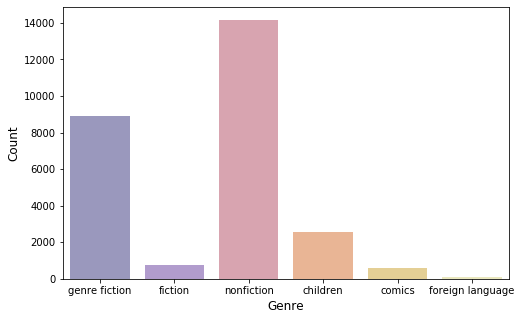

In [12]:
# plot for proportion of each genre in the dataframe
plt.rcParams['figure.figsize'] = (8, 5)
ax = sns.countplot(data = data_publishers, x ='genre', palette = 'CMRmap', alpha = 0.5)
ax.set_ylabel('Count', fontsize = 12)
ax.set_xlabel('Genre', fontsize = 12)
plt.show()

In [13]:
# replace 'genre fiction' with 'fiction' to consider both as same genre
data_publishers_tidy = data_publishers.replace(to_replace = "genre fiction",  value = "fiction")
data_publishers_tidy.head()

,genre,sold by,daily average.amazon revenue,daily average.author revenue,daily average.gross sales,daily average.publisher revenue,daily average.units sold,publisher.name,publisher.type,statistics.average rating,statistics.sale price,statistics.sales rank,statistics.total reviews
0,fiction,HarperCollins Publishers,6832.0,6832.0,34160.0,20496.0,7000,Katherine Tegen Books,big five,4.57,4.88,1,9604
1,fiction,HarperCollins Publishers,2487.5,2487.5,12437.5,7462.5,6250,HarperCollins e-books,big five,4.47,1.99,2,450
2,fiction,"Amazon Digital Services, Inc.",9559.0,9559.0,47795.0,28677.0,5500,(Small or Medium Publisher),small/medium,4.16,8.69,3,30
3,fiction,Hachette Book Group,8250.0,8250.0,41250.0,24750.0,5500,"Little, Brown and Company",big five,3.84,7.50,3,3747
4,fiction,Penguin Group (USA) LLC,7590.5,7590.5,37952.5,22771.5,4750,Dutton Children's,big five,4.75,7.99,4,9174


In [14]:
# get the proportion of each genre in the dataframe again
print((data_publishers_tidy.groupby(['genre'])['statistics.average rating'].count()/data_publishers_tidy.shape[0])*100)

genre
children             9.401709
comics               2.101602
fiction             35.653236
foreign language     0.447700
nonfiction          52.395752
Name: statistics.average rating, dtype: float64


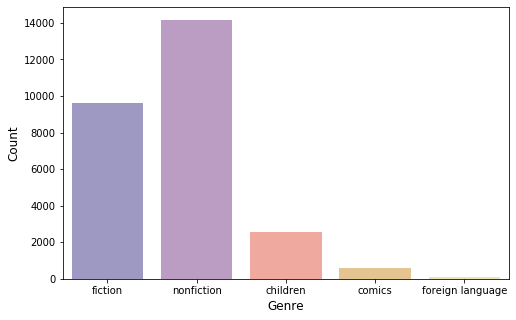

In [15]:
# plot for proportion of each genre in the dataframe
plt.rcParams['figure.figsize'] = (8, 5)
ax = sns.countplot(data = data_publishers_tidy, x ='genre', palette = 'CMRmap', alpha = 0.5)
ax.set_ylabel('Count', fontsize = 12)
ax.set_xlabel('Genre', fontsize = 12)
plt.show()

In [16]:
# remove the genres that has very less proportion in the dataframe to avoid class imbalance issues
data_publishers_tidy = data_publishers_tidy.drop(data_publishers_tidy[(data_publishers_tidy['genre'] == 'children') |
                                                                     (data_publishers_tidy['genre'] == 'comics') |
                                                                     (data_publishers_tidy['genre'] == 'foreign language')]
                                                                     .index) 
data_publishers_tidy.head()

,genre,sold by,daily average.amazon revenue,daily average.author revenue,daily average.gross sales,daily average.publisher revenue,daily average.units sold,publisher.name,publisher.type,statistics.average rating,statistics.sale price,statistics.sales rank,statistics.total reviews
0,fiction,HarperCollins Publishers,6832.0,6832.0,34160.0,20496.0,7000,Katherine Tegen Books,big five,4.57,4.88,1,9604
1,fiction,HarperCollins Publishers,2487.5,2487.5,12437.5,7462.5,6250,HarperCollins e-books,big five,4.47,1.99,2,450
2,fiction,"Amazon Digital Services, Inc.",9559.0,9559.0,47795.0,28677.0,5500,(Small or Medium Publisher),small/medium,4.16,8.69,3,30
3,fiction,Hachette Book Group,8250.0,8250.0,41250.0,24750.0,5500,"Little, Brown and Company",big five,3.84,7.50,3,3747
4,fiction,Penguin Group (USA) LLC,7590.5,7590.5,37952.5,22771.5,4750,Dutton Children's,big five,4.75,7.99,4,9174


In [17]:
# get the proportion of each genre in the dataframe after removing a few genres
print(data_publishers_tidy.shape)
print((data_publishers_tidy.groupby(['genre'])['statistics.average rating'].count()/data_publishers_tidy.shape[0])*100)

(23797, 13)
genre
fiction       40.492499
nonfiction    59.507501
Name: statistics.average rating, dtype: float64


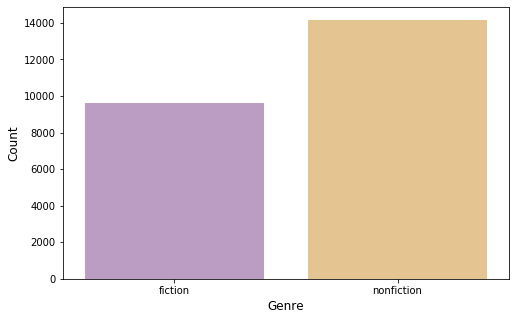

In [18]:
# plot for proportion of each genre in the dataframe
plt.rcParams['figure.figsize'] = (8, 5)
ax = sns.countplot(data = data_publishers_tidy, x ='genre', palette = 'CMRmap', alpha = 0.5)
ax.set_ylabel('Count', fontsize = 12)
ax.set_xlabel('Genre', fontsize = 12)
plt.show()

In [19]:
# dropping sold by and publisher.name since they do not impact the rating 
# get the dummy values for genre and publisher.type
data_publishers_tidy = pd.get_dummies(data_publishers_tidy.iloc[:,[0,2,3,4,5,6,8,9,10,11,12]], drop_first = True)
data_publishers_tidy.head()

,daily average.amazon revenue,daily average.author revenue,daily average.gross sales,daily average.publisher revenue,daily average.units sold,statistics.average rating,statistics.sale price,statistics.sales rank,statistics.total reviews,genre_nonfiction,publisher.type_big five,publisher.type_indie,publisher.type_single author,publisher.type_small/medium
0,6832.0,6832.0,34160.0,20496.0,7000,4.57,4.88,1,9604,0,1,0,0,0
1,2487.5,2487.5,12437.5,7462.5,6250,4.47,1.99,2,450,0,1,0,0,0
2,9559.0,9559.0,47795.0,28677.0,5500,4.16,8.69,3,30,0,0,0,0,1
3,8250.0,8250.0,41250.0,24750.0,5500,3.84,7.50,3,3747,0,1,0,0,0
4,7590.5,7590.5,37952.5,22771.5,4750,4.75,7.99,4,9174,0,1,0,0,0


## Data Exploration

The important variables to predict average rating of the book are:
daily average.publisher revenue    0.012713
daily average.units sold           0.011972
statistics.average rating          1.000000
statistics.sales rank              0.045586
statistics.total reviews           0.041710
genre_nonfiction                   0.045907
publisher.type_big five            0.042833
publisher.type_single author       0.022082
publisher.type_small/medium        0.024398
Name: statistics.average rating, dtype: float64


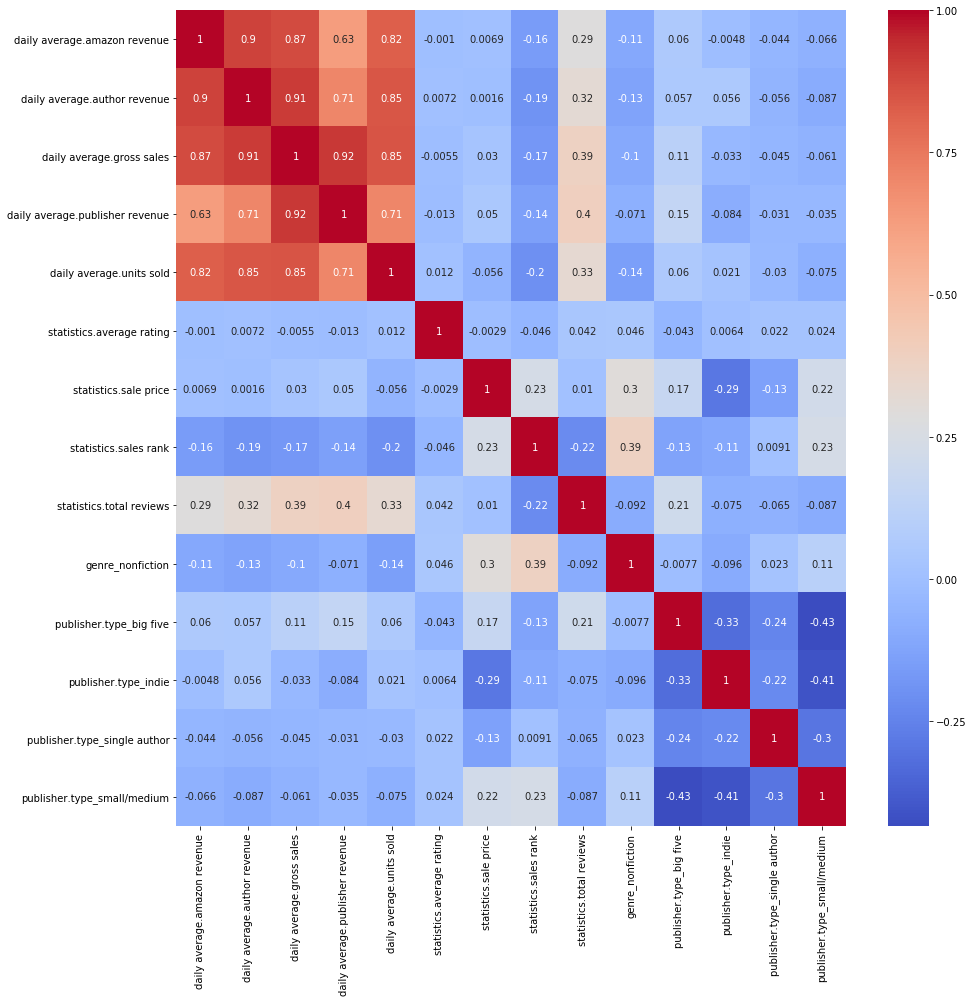

In [20]:
# get the correlation matrix and plot heatmap to check the correlation of statistics.average rating with other variables
correlation_matrix = data_publishers_tidy.corr()
correlation_features = correlation_matrix.index
plt.figure(figsize=(15,15))
graph = sns.heatmap(data_publishers_tidy[correlation_features].corr(),annot=True,cmap="coolwarm")

# get the variables with correlation > 0.01 as important variables
correlation_y = abs(correlation_matrix["statistics.average rating"])
important_features = correlation_y[correlation_y > 0.01]
print("The important variables to predict average rating of the book are:")
print(important_features)

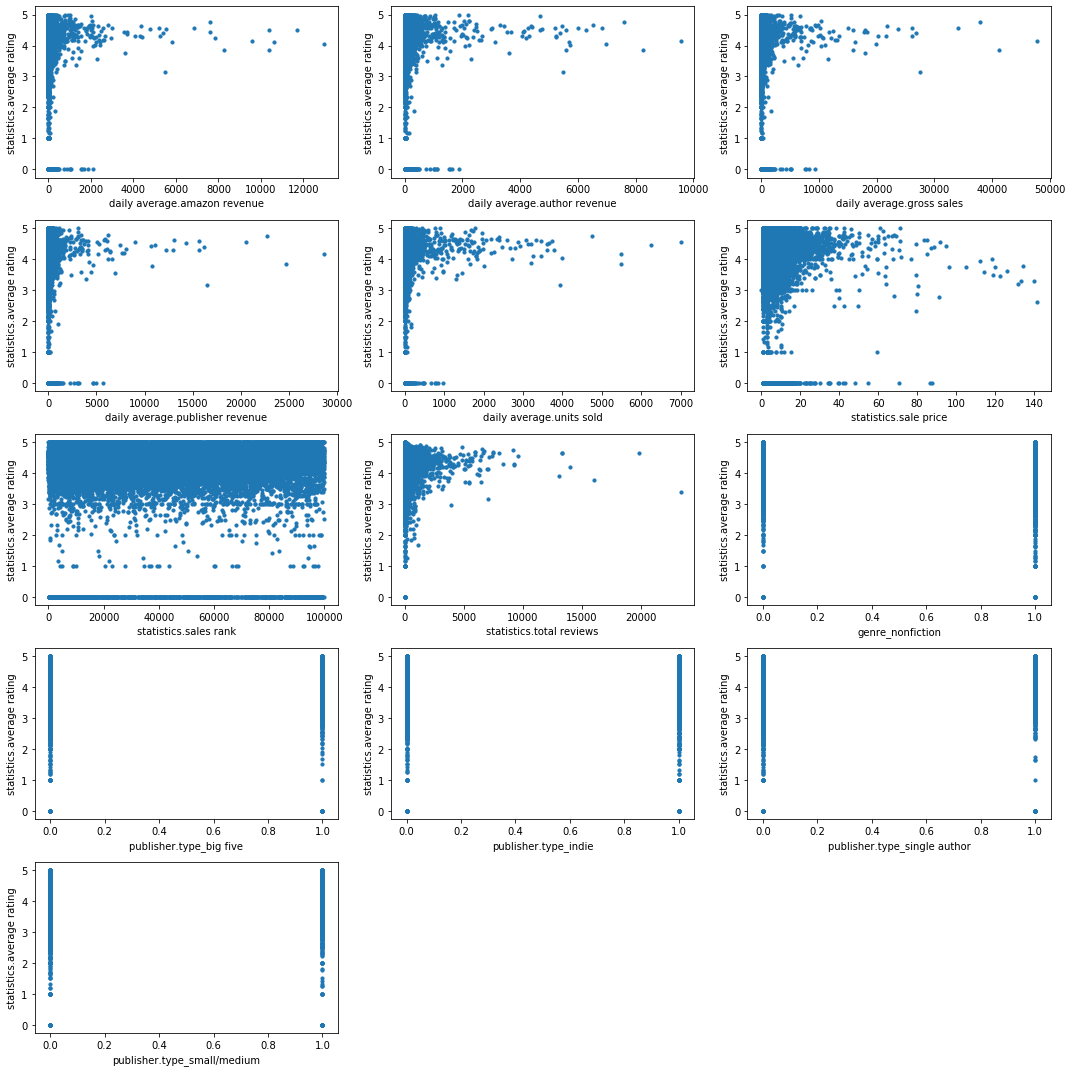

In [21]:
# Pair-wise Scatter Plots with 'statistics.average rating' and all other attributes to determine the relationship 
# between 'statistics.average rating' and other variables

fig1, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12), 
      (ax13, ax14, ax15)) = plt.subplots(5,3, figsize = (15,15))

data_publishers_tidy.plot.scatter(x='daily average.amazon revenue', y='statistics.average rating', s = 10, ax = ax1)

data_publishers_tidy.plot.scatter(x='daily average.author revenue', y='statistics.average rating', s = 10, ax = ax2)

data_publishers_tidy.plot.scatter(x='daily average.gross sales', y='statistics.average rating', s = 10, ax = ax3)

data_publishers_tidy.plot.scatter(x='daily average.publisher revenue', y='statistics.average rating', s = 10, ax = ax4)

data_publishers_tidy.plot.scatter(x='daily average.units sold', y='statistics.average rating', s = 10, ax = ax5)

data_publishers_tidy.plot.scatter(x='statistics.sale price', y='statistics.average rating', s = 10, ax = ax6)

data_publishers_tidy.plot.scatter(x='statistics.sales rank', y='statistics.average rating', s = 10, ax = ax7)

data_publishers_tidy.plot.scatter(x='statistics.total reviews', y='statistics.average rating', s = 10, ax = ax8)

data_publishers_tidy.plot.scatter(x='genre_nonfiction', y='statistics.average rating', s = 10, ax = ax9)

data_publishers_tidy.plot.scatter(x='publisher.type_big five', y='statistics.average rating', s = 10, ax = ax10)

data_publishers_tidy.plot.scatter(x='publisher.type_indie', y='statistics.average rating', s = 10, ax = ax11)

data_publishers_tidy.plot.scatter(x='publisher.type_single author', y='statistics.average rating', s = 10, ax = ax12)

data_publishers_tidy.plot.scatter(x='publisher.type_small/medium', y='statistics.average rating', s = 10, ax = ax13)

fig1.delaxes(ax= ax14)
fig1.delaxes(ax= ax15)

plt.tight_layout()

[-0.00000000e+00  0.00000000e+00 -1.27569833e-05 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.43437806e-06  4.05001288e-05
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00]

The coefficient values of the variables using Lasso model:
daily average.amazon revenue      -0.000000
daily average.author revenue       0.000000
daily average.gross sales         -0.000013
daily average.publisher revenue   -0.000000
daily average.units sold           0.000000
statistics.sale price              0.000000
statistics.sales rank             -0.000001
statistics.total reviews           0.000041
genre_nonfiction                   0.000000
publisher.type_big five           -0.000000
publisher.type_indie               0.000000
publisher.type_single author       0.000000
publisher.type_small/medium        0.000000
dtype: float64


Text(0.5, 1.0, 'Feature importance using Lasso Model')

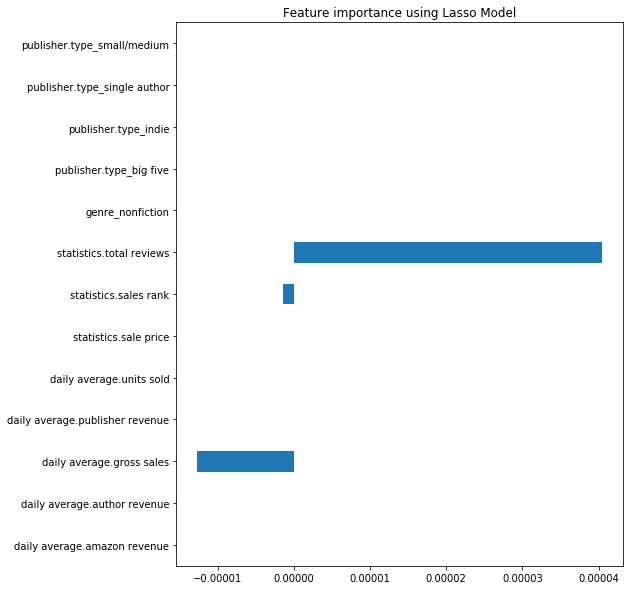

In [22]:
# perform feature selection using LASSO model(LassoCV) to predict 'statistics.average rating'

X = data_publishers_tidy.iloc[:,[0,1,2,3,4,6,7,8,9,10,11,12,13]]
y = data_publishers_tidy.iloc[:,[5]] 
lasso_model = linear_model.LassoCV(cv=5)
y = y.values.ravel()
lasso_model.fit(X, y)
print(lasso_model.coef_)
coef = pd.Series(lasso_model.coef_, index = X.columns)
print()
print("The coefficient values of the variables using Lasso model:")
print(coef)
important_features = coef
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
important_features.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

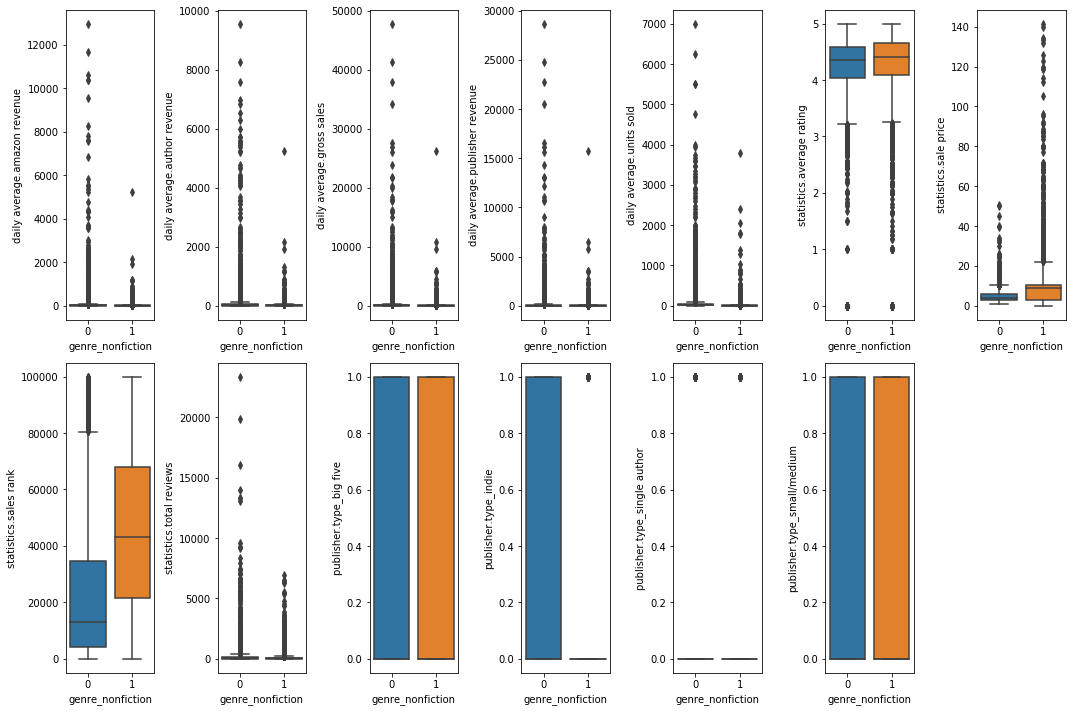

In [23]:
# Descriptive Statistics with repect to 'genre' to determine the important variables for classifying the dataset into
# fiction and nonfiction

pd.set_option('display.max_column',None)
data_publishers_tidy.groupby(data_publishers_tidy['genre_nonfiction']).describe()

fig2, axes = plt.subplots(2,7,figsize = (15,10))

sns.boxplot(y = 'daily average.amazon revenue', x = 'genre_nonfiction' ,data = data_publishers_tidy, ax = axes[0,0])

sns.boxplot(y = 'daily average.author revenue', x = 'genre_nonfiction' ,data = data_publishers_tidy, ax = axes[0,1])

sns.boxplot(y = 'daily average.gross sales', x = 'genre_nonfiction' ,data = data_publishers_tidy, ax = axes[0,2])

sns.boxplot(y = 'daily average.publisher revenue', x = 'genre_nonfiction' ,data = data_publishers_tidy, ax = axes[0,3])

sns.boxplot(y = 'daily average.units sold', x = 'genre_nonfiction' ,data = data_publishers_tidy, ax = axes[0,4])

sns.boxplot(y = 'statistics.average rating', x = 'genre_nonfiction' ,data = data_publishers_tidy, ax = axes[0,5])

sns.boxplot(y = 'statistics.sale price', x = 'genre_nonfiction' ,data = data_publishers_tidy, ax = axes[0,6])

sns.boxplot(y = 'statistics.sales rank', x = 'genre_nonfiction' ,data = data_publishers_tidy, ax = axes[1,0])

sns.boxplot(y = 'statistics.total reviews', x = 'genre_nonfiction' ,data = data_publishers_tidy, ax = axes[1,1])

sns.boxplot(y = 'publisher.type_big five', x = 'genre_nonfiction' ,data = data_publishers_tidy, ax = axes[1,2])

sns.boxplot(y = 'publisher.type_indie', x = 'genre_nonfiction' ,data = data_publishers_tidy, ax = axes[1,3])

sns.boxplot(y = 'publisher.type_single author', x = 'genre_nonfiction' ,data = data_publishers_tidy, ax = axes[1,4])

sns.boxplot(y = 'publisher.type_small/medium', x = 'genre_nonfiction' ,data = data_publishers_tidy, ax = axes[1,5])

fig2.delaxes(ax = axes[1,6])

plt.tight_layout()

## Regression

In [24]:
data_publishers_tidy.head(10)

,daily average.amazon revenue,daily average.author revenue,daily average.gross sales,daily average.publisher revenue,daily average.units sold,statistics.average rating,statistics.sale price,statistics.sales rank,statistics.total reviews,genre_nonfiction,publisher.type_big five,publisher.type_indie,publisher.type_single author,publisher.type_small/medium
0,6832.000,6832.000,34160.00,20496.000,7000,4.57,4.88,1,9604,0,1,0,0,0
1,2487.500,2487.500,12437.50,7462.500,6250,4.47,1.99,2,450,0,1,0,0,0
2,9559.000,9559.000,47795.00,28677.000,5500,4.16,8.69,3,30,0,0,0,0,1
3,8250.000,8250.000,41250.00,24750.000,5500,3.84,7.50,3,3747,0,1,0,0,0
4,7590.500,7590.500,37952.50,22771.500,4750,4.75,7.99,4,9174,0,1,0,0,0
5,12974.000,6986.000,19960.00,0.000,4000,4.05,4.99,5,40,0,0,0,0,0
6,5498.334,5498.334,27491.67,16495.002,3933,3.16,6.99,6,7026,0,1,0,0,0
7,5236.400,5236.400,26182.00,15709.200,3800,4.31,6.89,8,369,1,1,0,0,0
8,5218.734,5218.734,26093.67,15656.202,3733,4.58,6.99,9,5926,0,1,0,0,0
9,4758.468,4758.468,23792.34,14275.404,3666,4.52,6.49,10,7132,0,1,0,0,0


In [25]:
#splits into training and testing 
x_train, x_test, y_train, y_test = train_test_split(data_publishers_tidy[[ 'daily average.amazon revenue','daily average.author revenue',
                                                                     'daily average.gross sales','daily average.publisher revenue',
                                                                     'daily average.units sold',
                                                                     'statistics.sale price','statistics.sales rank','statistics.total reviews',
                                                                          'genre_nonfiction','publisher.type_big five','publisher.type_indie',
                                                                          'publisher.type_single author','publisher.type_small/medium'
                                                         ]], data_publishers_tidy['statistics.average rating'],test_size = 0.2, random_state = 0)
#split into validation set
x_train,x_val,y_train,y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 1)



In [26]:
#Standardize the training set and the validation set
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_val_scaled = scaler.transform(x_val)

In [27]:
#linear regression 

LR_model = linear_model.LinearRegression().fit(X=x_train_scaled[:,[6,7,8,9,11]], y=y_train)

print()
print("Coefficients:")
print(LR_model.coef_)


print()
print("Intercept:")
print(LR_model.intercept_)


Coefficients:
[-0.06866589  0.04197282  0.07818464 -0.05498295  0.01133909]

Intercept:
4.154230087333377


In [28]:
#Linear regression - validation set

#predicting based on amazon revenue, author revenue, gross sales
LR_predicted = LR_model.predict(x_val_scaled[:,[6,7,8,9,11]])

R_squared = LR_model.score(X=x_val_scaled[:,[6,7,8,9,11]],y=y_val)
print('R sqaured')
print(R_squared)
print()

Adjusted_R_squared = 1-(((1-R_squared)*(len(x_val_scaled)-1))/(len(x_val_scaled)-3))
print('Adjusted R squared')
print( Adjusted_R_squared)
print()

RootMeanSquare = sqrt(mean_squared_error(y_val, LR_predicted))
print('Root Mean Square')
print(RootMeanSquare)


R sqaured
0.010244985567628206

Adjusted R squared
0.009724746401040818

Root Mean Square
0.9342690384808173


In [29]:
#linear regression with different set of variables

LR_model = linear_model.LinearRegression().fit(X=x_train_scaled[:,[6,7,8,9,11,12]], y=y_train)

print()
print("Coefficients:")
print(LR_model.coef_)

print()
print("Intercept:")
print(LR_model.intercept_)
print()

LR_predicted = LR_model.predict(x_val_scaled[:,[6,7,8,9,11,12]])

LR_R_squared = LR_model.score(X=x_val_scaled[:,[6,7,8,9,11,12]],y=y_val)
print('R sqaured')
print(LR_R_squared)
print()

LR_Adjusted_R_squared = 1-(((1-LR_R_squared)*(len(x_val_scaled)-1))/(len(x_val_scaled)-5))
print('Adjusted R squared')
print( LR_Adjusted_R_squared)
print()

LR_RootMeanSquareError = sqrt(mean_squared_error(y_val, LR_predicted))
print('Root Mean Square Error')
print(LR_RootMeanSquareError)


Coefficients:
[-0.0708915   0.04145797  0.077324   -0.04737677  0.01754278  0.01457568]

Intercept:
4.154230087333377

R sqaured
0.010985032536789173

Adjusted R squared
0.00994478539772714

Root Mean Square Error
0.9339196933144313


In [30]:
#Ridge regression with selected features

Ridge_model = linear_model.Ridge(alpha = 1).fit(X=x_train_scaled[:,[6,7,8,9,11,12]], y=y_train)

print()
print("Coefficients:")
print(Ridge_model.coef_)

print()
print("Intercept:")
print(Ridge_model.intercept_)
print()

Ridge_predicted = Ridge_model.predict(x_val_scaled[:,[6,7,8,9,11,12]])

Ridge_R_squared = Ridge_model.score(X=x_val_scaled[:,[6,7,8,9,11,12]],y=y_val)
print('R sqaured')
print(Ridge_R_squared)
print()

Ridge_Adjusted_R_squared = 1-(((1-Ridge_R_squared)*(len(x_val_scaled)-1))/(len(x_val_scaled)-5))
print('Adjusted R squared')
print( Ridge_Adjusted_R_squared)
print()

Ridge_RootMeanSquareError = sqrt(mean_squared_error(y_val, Ridge_predicted))
print('Root Mean Square Error')
print(Ridge_RootMeanSquareError)


Coefficients:
[-0.07088359  0.04145525  0.07731571 -0.04737235  0.01754259  0.01457545]

Intercept:
4.154230087333377

R sqaured
0.010985048833731414

Adjusted R squared
0.009944801711810558

Root Mean Square Error
0.9339196856198888


In [31]:
# Decision Tree regression with selected features

DT_model = tree.DecisionTreeRegressor().fit(X = x_train_scaled[:,[6,7,8,9,11,12]], y = y_train)

DT_predicted = DT_model.predict(x_val_scaled[:,[6,7,8,9,11,12]])

DT_R_square = DT_model.score(X = x_val_scaled[:,[6,7,8,9,11,12]],y = y_val)
print('R squared')
print(DT_R_square)
print()

DT_Adjusted_R_squared = 1-(((1-DT_R_square)*(len(x_val_scaled)-1))/(len(x_val_scaled)-5))
print('Adjusted R squared')
print( DT_Adjusted_R_squared)
print()

DT_RootMeanSquareError = np.sqrt(mean_squared_error(y_val, DT_predicted))
print('Root Mean Square Error')
print(DT_RootMeanSquareError)

R squared
0.5427544763643035

Adjusted R squared
0.5422735449694724

Root Mean Square Error
0.6350133162105389


In [32]:
# Gradient Boost Regreesion with selected features

y_train =y_train.ravel()
GB_model = GradientBoostingRegressor(n_estimators=10, learning_rate=0.1,
          max_depth=1, random_state=0).fit(X = x_train_scaled[:,[6,7,8,9,11,12]], y = y_train)

GB_predicted = GB_model.predict(x_val_scaled[:,[6,7,8,9,11,12]])

GB_R_square = GB_model.score(X = x_val_scaled[:,[6,7,8,9,11,12]],y = y_val)
print('R square')
print(GB_R_square)
print()

GB_Adjusted_R_squared = 1-(((1-GB_R_square)*(len(x_val_scaled)-1))/(len(x_val_scaled)-5))
print('Adjusted R squared')
print( GB_Adjusted_R_squared)
print()

GB_RootMeanSquareError = np.sqrt(mean_squared_error(y_val, GB_predicted))
print('Root Mean Square Error')
print(GB_RootMeanSquareError)

print(GB_model.feature_importances_ )

R square
0.6721424769608965

Adjusted R squared
0.6717976360215969

Root Mean Square Error
0.5377131754512429
[0. 1. 0. 0. 0. 0.]


In [33]:
# Random Forest Regression using selected variables

RF_model = RandomForestRegressor(n_estimators=10, random_state=42).fit(X = x_train_scaled[:,[6,7,8,9,11,12]], y = y_train)

RF_predicted = RF_model.predict(x_val_scaled[:,[6,7,8,9,11,12]])

RF_R_square = RF_model.score(X = x_val_scaled[:,[6,7,8,9,11,12]],y = y_val)
print('R square')
print(RF_R_square)
print()

RF_Adjusted_R_squared = 1-(((1-RF_R_square)*(len(x_val)-1))/(len(x_val)-5))
print('Adjusted R square')
print( RF_Adjusted_R_squared)
print()

RF_RootMeanSquareError = np.sqrt(mean_squared_error(y_val, RF_predicted))
print('Root Mean Square Error')
print(RF_RootMeanSquareError)
print()

print(RF_model.feature_importances_ )

R square
0.7117231663837745

Adjusted R square
0.7114199564614856

Root Mean Square Error
0.5042117624864959

[0.13536336 0.85164254 0.00519983 0.00108384 0.00282789 0.00388253]


In [34]:
# Prediction on test set using the best model

#Standardize the training set and the validation set

output = pd.DataFrame(x_test)

RF_predicted_test = RF_model.predict(x_test_scaled[:,[6,7,8,9,11,12]])

Test_RF_R_square = RF_model.score(X = x_test_scaled[:,[6,7,8,9,11,12]],y = y_test)
print('R square')
print(Test_RF_R_square)
print()

Test_RF_Adjusted_R_squared = 1-(((1-Test_RF_R_square)*(len(x_test)-1))/(len(x_test)-5))
print('Adjusted R square')
print( Test_RF_Adjusted_R_squared)
print()

Test_RF_RootMeanSquareError = np.sqrt(mean_squared_error(y_test, RF_predicted_test))
print('Root Mean Square Error')
print(Test_RF_RootMeanSquareError)
print()

output['Average Rating'] = y_test
output['Predicted Rating'] = RF_predicted_test

output.head(10)


R square
0.7213627736193311

Adjusted R square
0.7211283784762138

Root Mean Square Error
0.495206410576065



,daily average.amazon revenue,daily average.author revenue,daily average.gross sales,daily average.publisher revenue,daily average.units sold,statistics.sale price,statistics.sales rank,statistics.total reviews,genre_nonfiction,publisher.type_big five,publisher.type_indie,publisher.type_single author,publisher.type_small/medium,Average Rating,Predicted Rating
18476,2.392,2.392,11.96,7.176,4,2.99,52939,8,1,0,0,0,1,3.50,4.553
2976,29.900,29.900,149.50,89.700,50,2.99,4070,22,0,0,0,0,1,4.13,4.378
20381,9.592,9.592,47.96,28.776,4,11.99,61687,63,1,1,0,0,0,4.41,4.357
17496,10.790,10.790,53.95,32.370,5,10.79,48620,312,1,1,0,0,0,3.95,4.337
7677,38.974,38.974,194.87,116.922,13,14.99,14591,94,1,0,0,0,1,4.21,4.606
18079,9.592,9.592,47.96,28.776,4,11.99,51073,17,1,0,0,0,1,4.17,4.109
11605,5.980,5.980,29.90,17.940,10,2.99,26167,16,1,0,0,1,0,4.81,4.485
16684,10.782,25.158,35.94,0.000,6,5.99,45233,51,1,0,1,0,0,4.33,3.791
25568,3.600,3.600,18.00,10.800,1,18.00,90525,9,1,0,0,0,1,4.55,5.000
3225,51.471,120.099,171.57,0.000,43,3.99,4457,103,0,0,1,0,0,4.32,4.151


In [35]:
# get the max and min of predicted rating
print("Max: ",output['Predicted Rating'].max())
print("Min: ",output['Predicted Rating'].min())

Max:  5.0
Min:  0.0


In [36]:
# create a data frame with RMSE and Adjusted R Square
AdjR2_RMSE = [['Linear Regression', LR_RootMeanSquareError, LR_Adjusted_R_squared], 
              ['Ridge Regression', Ridge_RootMeanSquareError, Ridge_Adjusted_R_squared], 
              ['Decision Tree Regreesion', DT_RootMeanSquareError, DT_Adjusted_R_squared],
              ['Gradient Boosting Regressor', GB_RootMeanSquareError, GB_Adjusted_R_squared], 
              ['Random Forest Regressor', RF_RootMeanSquareError, RF_Adjusted_R_squared], 
              ['Random Forest Regressor on Test Set', Test_RF_RootMeanSquareError, Test_RF_Adjusted_R_squared]] 
ModelEvaluation = pd.DataFrame(AdjR2_RMSE, columns = ['Model', 'RMSE', 'AdjR2'])

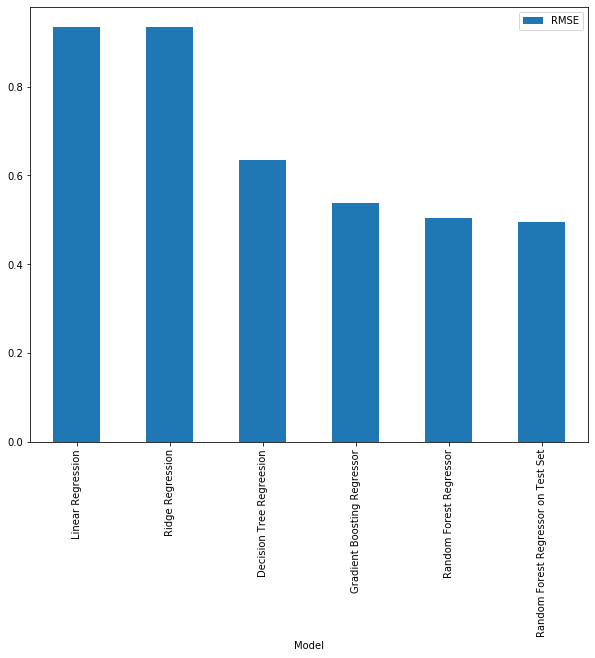

In [37]:
# plot showing the performance of the models with respect to RMSE
plt.rcParams['figure.figsize'] = (10, 8)
ModelEvaluation.plot(kind='bar',x='Model',y='RMSE')

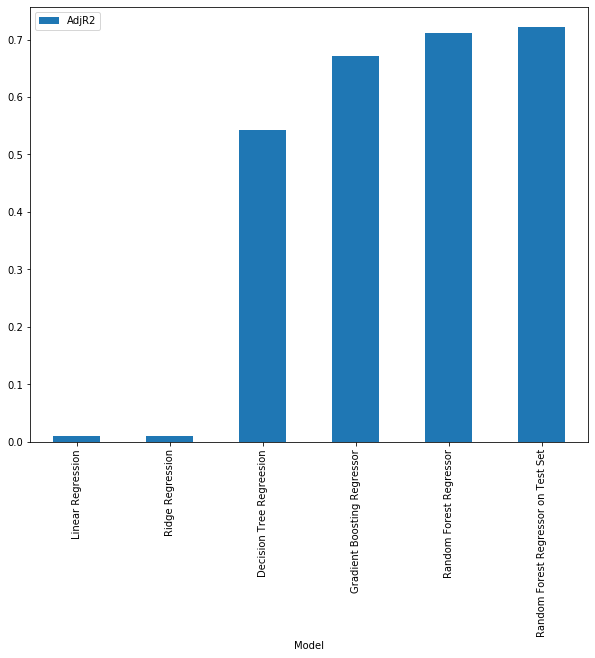

In [38]:
# plot showing the performance of the models with respect to Adjuested R Square
plt.rcParams['figure.figsize'] = (10, 8)
ModelEvaluation.plot(kind='bar',x='Model',y='AdjR2')

### Classification

In [39]:
#splits into training and testing 
x_clf_train, x_clf_test, y_clf_train, y_clf_test = train_test_split(data_publishers_tidy[[ 'daily average.amazon revenue','daily average.author revenue',
                                                                     'daily average.gross sales','daily average.publisher revenue',
                                                                     'daily average.units sold', 'statistics.average rating',
                                                                     'statistics.sale price','statistics.sales rank','statistics.total reviews',
                                                                          'publisher.type_big five','publisher.type_indie',
                                                                          'publisher.type_single author','publisher.type_small/medium'
                                                         ]], data_publishers_tidy['genre_nonfiction'],test_size = 0.2, random_state = 0)
#split into validation set
x_clf_train, x_clf_val, y_clf_train, y_clf_val = train_test_split(x_clf_train, y_clf_train, test_size = 0.2, random_state = 1)



In [40]:
#Standardize the training set and the validation set
scaler = StandardScaler()
scaler.fit(x_clf_train)
x_clf_train_scaled = scaler.transform(x_clf_train)
x_clf_test_scaled = scaler.transform(x_clf_test)
x_clf_val_scaled = scaler.transform(x_clf_val)

In [41]:
model = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
model.fit(x_clf_train_scaled, y_clf_train)
y_pred = model.predict(x_clf_val_scaled)
conf_matrix = metrics.confusion_matrix(y_clf_val, y_pred)
print(conf_matrix)

# Compute evaluation metrics
print("Accuracy: ", metrics.accuracy_score(y_clf_val, y_pred)) # accuracy
print("Error: ", 1 - metrics.accuracy_score(y_clf_val, y_pred)) # error
print("Precision: ", metrics.precision_score(y_clf_val, y_pred, average = None)) # precision
print("Recall: ", metrics.recall_score(y_clf_val, y_pred, average = None)) # recall
print("F1 score: ", metrics.f1_score(y_clf_val, y_pred, average = None)) # F1 score

[[1067  449]
 [ 546 1746]]
Accuracy:  0.7387079831932774
Error:  0.26129201680672265
Precision:  [0.66150031 0.79544419]
Recall:  [0.70382586 0.7617801 ]
F1 score:  [0.68200703 0.77824827]


In [42]:
model = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
model.fit(x_clf_train_scaled[:,[5,6,7,9,10,12]], y_clf_train)
y_pred = model.predict(x_clf_val_scaled[:,[5,6,7,9,10,12]])
conf_matrix = metrics.confusion_matrix(y_clf_val, y_pred)
print(conf_matrix)

# Compute evaluation metrics
print("Accuracy: ", metrics.accuracy_score(y_clf_val, y_pred)) # accuracy
print("Error: ", 1 - metrics.accuracy_score(y_clf_val, y_pred)) # error
print("Precision: ", metrics.precision_score(y_clf_val, y_pred, average = None)) # precision
print("Recall: ", metrics.recall_score(y_clf_val, y_pred, average = None)) # recall
print("F1 score: ", metrics.f1_score(y_clf_val, y_pred, average = None)) # F1 score

[[1055  461]
 [ 551 1741]]
Accuracy:  0.7342436974789915
Error:  0.26575630252100846
Precision:  [0.65691158 0.79064487]
Recall:  [0.69591029 0.7595986 ]
F1 score:  [0.67584881 0.77481086]


In [43]:
bag_clf = BaggingClassifier(base_estimator = DecisionTreeClassifier(criterion = "entropy", random_state = 0), n_estimators = 10, random_state = 0)
bag_clf.fit(x_clf_train_scaled, y_clf_train)
y_pred = bag_clf.predict(x_clf_val_scaled)
conf_matrix = metrics.confusion_matrix(y_clf_val, y_pred)
print(conf_matrix)

# Compute evaluation metrics
print("Accuracy: ", metrics.accuracy_score(y_clf_val, y_pred)) # accuracy
print("Error: ", 1 - metrics.accuracy_score(y_clf_val, y_pred)) # error
print("Precision: ", metrics.precision_score(y_clf_val, y_pred, average = None)) # precision
print("Recall: ", metrics.recall_score(y_clf_val, y_pred, average = None)) # recall
print("F1 score: ", metrics.f1_score(y_clf_val, y_pred, average = None)) # F1 score

[[1170  346]
 [ 481 1811]]
Accuracy:  0.7828256302521008
Error:  0.21717436974789917
Precision:  [0.70866142 0.83959203]
Recall:  [0.77176781 0.79013962]
F1 score:  [0.73886959 0.81411553]


In [44]:
ada_clf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(criterion = "entropy", random_state = 0), n_estimators = 10, random_state = 0)
ada_clf.fit(x_clf_train_scaled, y_clf_train)
y_pred = ada_clf.predict(x_clf_val_scaled)
conf_matrix = metrics.confusion_matrix(y_clf_val, y_pred)
print(conf_matrix)

# Compute evaluation metrics
print("Accuracy: ", metrics.accuracy_score(y_clf_val, y_pred)) # accuracy
print("Error: ", 1 - metrics.accuracy_score(y_clf_val, y_pred)) # error
print("Precision: ", metrics.precision_score(y_clf_val, y_pred, average = None)) # precision
print("Recall: ", metrics.recall_score(y_clf_val, y_pred, average = None)) # recall
print("F1 score: ", metrics.f1_score(y_clf_val, y_pred, average = None)) # F1 score

[[1066  450]
 [ 548 1744]]
Accuracy:  0.7379201680672269
Error:  0.26207983193277307
Precision:  [0.66047088 0.79489517]
Recall:  [0.70316623 0.7609075 ]
F1 score:  [0.68115016 0.77753009]


In [45]:
RF_clf = RandomForestClassifier(n_estimators = 10, criterion = "entropy", random_state = 0)
RF_clf.fit(x_clf_train_scaled, y_clf_train)
y_pred = RF_clf.predict(x_clf_val_scaled)
conf_matrix = metrics.confusion_matrix(y_clf_val, y_pred)
print(conf_matrix)

# Compute evaluation metrics
print("Accuracy: ", metrics.accuracy_score(y_clf_val, y_pred)) # accuracy
print("Error: ", 1 - metrics.accuracy_score(y_clf_val, y_pred)) # error
print("Precision: ", metrics.precision_score(y_clf_val, y_pred, average = None)) # precision
print("Recall: ", metrics.recall_score(y_clf_val, y_pred, average = None)) # recall
print("F1 score: ", metrics.f1_score(y_clf_val, y_pred, average = None)) # F1 score


[[1170  346]
 [ 509 1783]]
Accuracy:  0.7754726890756303
Error:  0.22452731092436973
Precision:  [0.69684336 0.83748239]
Recall:  [0.77176781 0.77792321]
F1 score:  [0.73239437 0.80660484]


## Clustering Analysis

In [46]:
clusterFeatures = data_publishers_tidy.iloc[:,[0,1,2,3,4,5,6,7,8,10,11,12,13]]
clusterClass = data_publishers_tidy['genre_nonfiction']#.reshape(-1,1)

In [47]:
scalerClusters = StandardScaler()
scalerClusters.fit(clusterFeatures)
clusterFeatures_scaled = scalerClusters.transform(clusterFeatures)

##Function to plot contingency matrixes
def plotClusters(title_arr,cont_matrix, rand_i,  sil_h, hom, compl):
    fig, ax = plt.subplots(1,len(cont_matrix) ,figsize=(15,15))
    plt.subplots_adjust( 
                    wspace = 0.8,  # the amount of width reserved for space between subplots,
                                  # expressed as a fraction of the average axis width
                    hspace = 0.2)  # the amount of height reserved for space between subplots,
                                  # expressed as a fraction of the average axis height)
    index = 0
    for tmp in ax :
        tmp.title.set_text(title_arr[index])
        sns.heatmap(cont_matrix[index], annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues, ax=tmp, cbar_kws = dict(orientation ='horizontal',use_gridspec=False))
        tmp.set_xlabel( 'Predicted\n' + 'Adjusted Rand Index: ' + str(rand_i[index]) + '\nSilhouette Coef: ' + str(sil_h[index]) 
                       + '\nHomogeneity: ' + str(hom[index]) + '\nCompleteness: ' + str(compl[index]) )
        tmp.set_ylabel('Actual')
        index = index + 1

### Hierarchical Complete

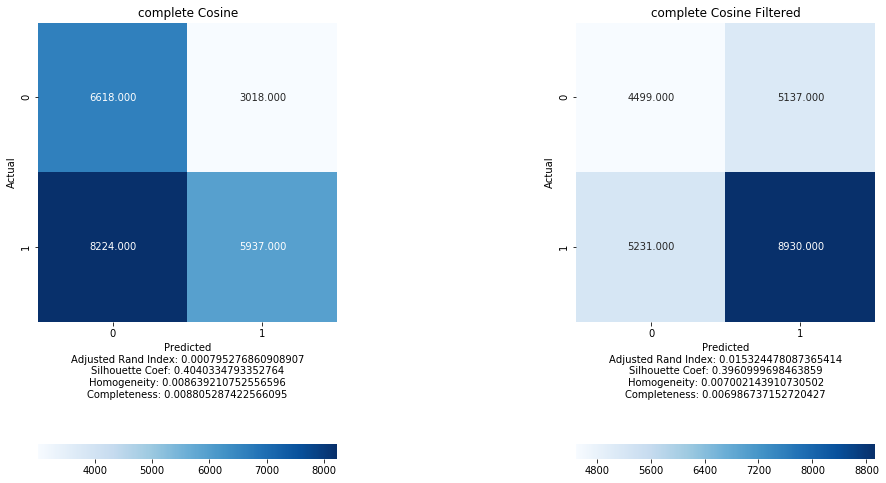

In [48]:
titles = []
cont_matrix_arr = []
sil_h_arr = []
adj_rand_i_arr = []
homog_arr = []
completeness_arr = []

#Hierarchical Complete - Cosine (All Variables)
clustering = linkage(clusterFeatures_scaled, method='complete', metric = 'cosine')
clusters = fcluster(clustering, 2, criterion = 'maxclust')
cont_matrix =  contingency_matrix(clusterClass, clusters)
adjusted_rand_index =   adjusted_rand_score(clusterClass, clusters)
silhouette_coefficient =  silhouette_score(clusterFeatures_scaled, clusters, metric='cosine')
#print([adjusted_rand_index, silhouette_coefficient])
titles.append("complete Cosine")
cont_matrix_arr.append(cont_matrix)
sil_h_arr.append(silhouette_coefficient)
adj_rand_i_arr.append(adjusted_rand_index)
homog_arr.append( homogeneity_score(clusterClass, clusters) )
completeness_arr.append( completeness_score(clusterClass, clusters))

vars = [
       'daily average.gross sales', 'daily average.publisher revenue',
       'daily average.units sold', 'statistics.average rating',
       'statistics.sale price', 'statistics.total reviews','publisher.type_single author',
       'publisher.type_small/medium']

scalerClustersFiltered = StandardScaler()
scalerClustersFiltered.fit(clusterFeatures[vars])
clusterFeatures_scaled_filtered = scalerClustersFiltered.transform(clusterFeatures[vars])

#Hierarchical Complete - Cosine (Filtered Variables)
clustering = linkage(clusterFeatures_scaled_filtered, method='complete', metric = 'cosine')
clusters = fcluster(clustering, 2, criterion = 'maxclust')
cont_matrix =  contingency_matrix(clusterClass, clusters)
adjusted_rand_index =   adjusted_rand_score(clusterClass, clusters)
silhouette_coefficient =  silhouette_score(clusterFeatures_scaled_filtered, clusters, metric='cosine')
#print([adjusted_rand_index, silhouette_coefficient])
titles.append("complete Cosine Filtered")
cont_matrix_arr.append(cont_matrix)
sil_h_arr.append(silhouette_coefficient)
adj_rand_i_arr.append(adjusted_rand_index)
homog_arr.append( homogeneity_score(clusterClass, clusters) )
completeness_arr.append( completeness_score(clusterClass, clusters))

plotClusters(titles,cont_matrix_arr,adj_rand_i_arr, sil_h_arr,homog_arr,completeness_arr)

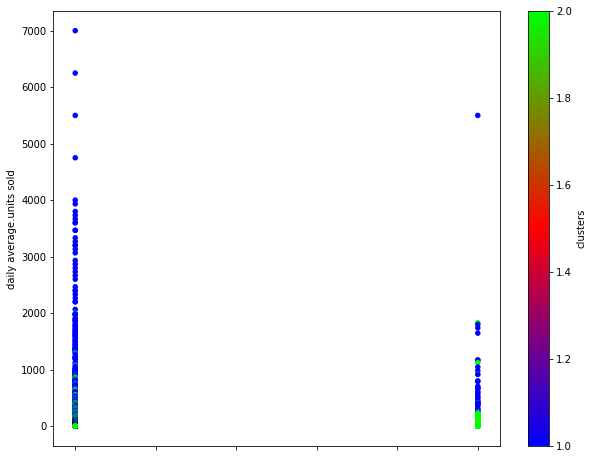

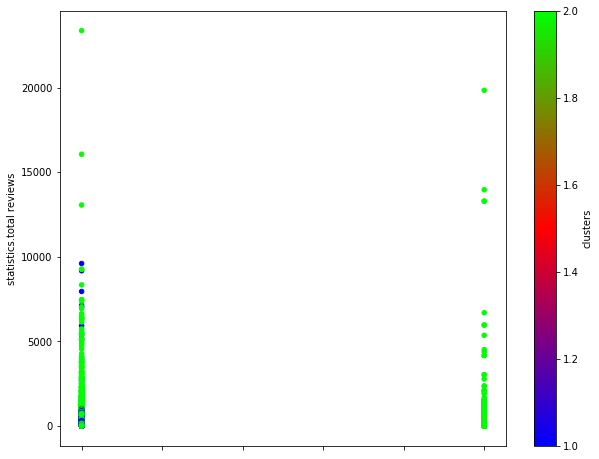

In [49]:
clusterFeatures['clusters'] = clusters
ax = clusterFeatures.plot(kind = 'scatter', x = 'publisher.type_small/medium', y = 'daily average.units sold', c = 'clusters', colormap = plt.cm.brg)
ax = clusterFeatures.plot(kind = 'scatter', x = 'publisher.type_small/medium', y = 'statistics.total reviews', c = 'clusters', colormap = plt.cm.brg)

### Hierarchical Average - All Features

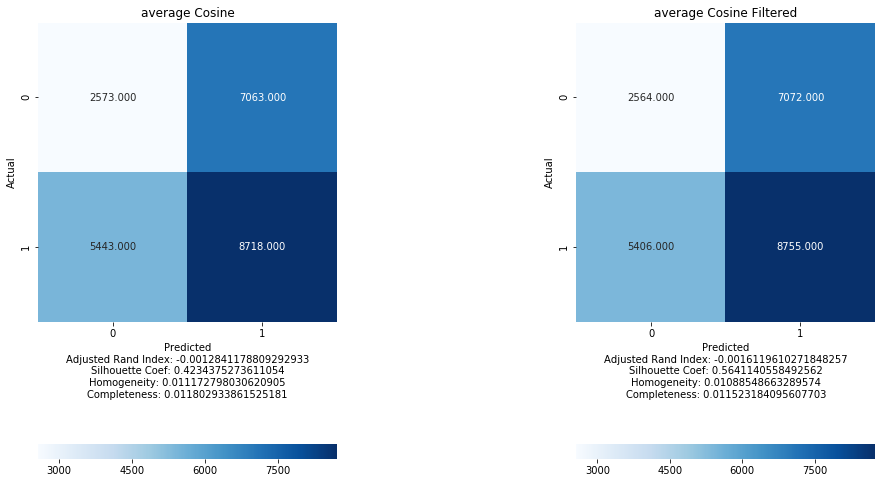

In [50]:
titles = []
cont_matrix_arr = []
sil_h_arr = []
adj_rand_i_arr = []
homog_arr = []
completeness_arr = []

#Hierarchical Average - Cosine (All Variables)
clustering = linkage(clusterFeatures_scaled, method='average', metric = 'cosine')
clusters = fcluster(clustering, 2, criterion = 'maxclust')
cont_matrix =  contingency_matrix(clusterClass, clusters)
adjusted_rand_index =   adjusted_rand_score(clusterClass, clusters)
silhouette_coefficient =  silhouette_score(clusterFeatures_scaled, clusters, metric='cosine')
#print([adjusted_rand_index, silhouette_coefficient])
titles.append("average Cosine")
cont_matrix_arr.append(cont_matrix)
sil_h_arr.append(silhouette_coefficient)
adj_rand_i_arr.append(adjusted_rand_index)
homog_arr.append( homogeneity_score(clusterClass, clusters) )
completeness_arr.append( completeness_score(clusterClass, clusters))

#Hierarchical Average - Minkowski (Filtered Variables)
clustering = linkage(clusterFeatures_scaled_filtered, method='average', metric = 'cosine')
clusters = fcluster(clustering, 2, criterion = 'maxclust')
cont_matrix =  contingency_matrix(clusterClass, clusters)
adjusted_rand_index =   adjusted_rand_score(clusterClass, clusters)
silhouette_coefficient =  silhouette_score(clusterFeatures_scaled_filtered, clusters, metric='cosine')
#print([adjusted_rand_index, silhouette_coefficient])
titles.append("average Cosine Filtered")
cont_matrix_arr.append(cont_matrix)
sil_h_arr.append(silhouette_coefficient)
adj_rand_i_arr.append(adjusted_rand_index)
homog_arr.append( homogeneity_score(clusterClass, clusters) )
completeness_arr.append( completeness_score(clusterClass, clusters))


plotClusters(titles,cont_matrix_arr,adj_rand_i_arr, sil_h_arr,homog_arr,completeness_arr)

### K-Means - All Features

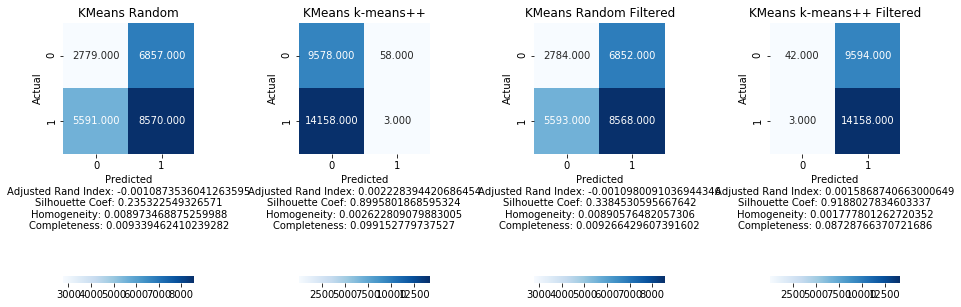

In [51]:
titles = []
cont_matrix_arr = []
sil_h_arr = []
adj_rand_i_arr = []
homog_arr = []
completeness_arr = []

#KMeans
clustering = KMeans(n_clusters = 2, init ='random', n_init = 10, random_state = 0).fit(clusterFeatures_scaled)
clusters = clustering.labels_
cont_matrix =  contingency_matrix(clusterClass, clusters)
adjusted_rand_index =   adjusted_rand_score(clusterClass, clusters)
silhouette_coefficient =  silhouette_score(clusterFeatures_scaled, clusters, metric='euclidean')
#print([adjusted_rand_index, silhouette_coefficient])
titles.append("KMeans Random")
cont_matrix_arr.append(cont_matrix)
sil_h_arr.append(silhouette_coefficient)
adj_rand_i_arr.append(adjusted_rand_index)
homog_arr.append( homogeneity_score(clusterClass, clusters) )
completeness_arr.append( completeness_score(clusterClass, clusters))

clustering = KMeans(n_clusters = 2, init ='k-means++', n_init = 10, random_state = 0).fit(clusterFeatures_scaled)
clusters = clustering.labels_
cont_matrix =  contingency_matrix(clusterClass, clusters)
adjusted_rand_index =   adjusted_rand_score(clusterClass, clusters)
silhouette_coefficient =  silhouette_score(clusterFeatures_scaled, clusters, metric='euclidean')
#print([adjusted_rand_index, silhouette_coefficient])
titles.append("KMeans k-means++")
cont_matrix_arr.append(cont_matrix)
sil_h_arr.append(silhouette_coefficient)
adj_rand_i_arr.append(adjusted_rand_index)
homog_arr.append( homogeneity_score(clusterClass, clusters) )
completeness_arr.append( completeness_score(clusterClass, clusters))

#KMeans Filtered
clustering = KMeans(n_clusters = 2, init ='random', n_init = 10, random_state = 0).fit(clusterFeatures_scaled_filtered)
clusters = clustering.labels_
cont_matrix =  contingency_matrix(clusterClass, clusters)
adjusted_rand_index =   adjusted_rand_score(clusterClass, clusters)
silhouette_coefficient =  silhouette_score(clusterFeatures_scaled_filtered, clusters, metric='euclidean')
#print([adjusted_rand_index, silhouette_coefficient])
titles.append("KMeans Random Filtered")
cont_matrix_arr.append(cont_matrix)
sil_h_arr.append(silhouette_coefficient)
adj_rand_i_arr.append(adjusted_rand_index)
homog_arr.append( homogeneity_score(clusterClass, clusters) )
completeness_arr.append( completeness_score(clusterClass, clusters))

#KMEANS Filtered
clustering = KMeans(n_clusters = 2, init ='k-means++', n_init = 10, random_state = 0).fit(clusterFeatures_scaled_filtered)
clusters = clustering.labels_
cont_matrix =  contingency_matrix(clusterClass, clusters)
adjusted_rand_index =   adjusted_rand_score(clusterClass, clusters)
silhouette_coefficient =  silhouette_score(clusterFeatures_scaled_filtered, clusters, metric='euclidean')
#print([adjusted_rand_index, silhouette_coefficient])
titles.append("KMeans k-means++ Filtered")
cont_matrix_arr.append(cont_matrix)
sil_h_arr.append(silhouette_coefficient)
adj_rand_i_arr.append(adjusted_rand_index)
homog_arr.append( homogeneity_score(clusterClass, clusters) )
completeness_arr.append( completeness_score(clusterClass, clusters))


plotClusters(titles,cont_matrix_arr,adj_rand_i_arr, sil_h_arr,homog_arr,completeness_arr)

### True Clusters

In [52]:
silhouette_coefficient =  silhouette_score(clusterFeatures, clusterClass, metric='euclidean')
print(silhouette_coefficient)

0.12241818173348551


In [53]:
# Prediction of rating on test set using the best regresssion model

#Standardize the training set and the validation set

output = pd.DataFrame(x_test)

RF_predicted_test = RF_model.predict(x_test_scaled[:,[6,7,8,9,11,12]])

R_square = RF_model.score(X = x_test_scaled[:,[6,7,8,9,11,12]],y = y_test)
print('R square')
print(R_square)
print()

Adjusted_R_square = 1-(((1-R_square)*(len(x_test)-1))/(len(x_test)-5))
print('Adjusted R square')
print( Adjusted_R_square)
print()

RootMeanSquareError = np.sqrt(mean_squared_error(y_test, RF_predicted_test))
print('Root Mean Square Error')
print(RootMeanSquareError)
print()

output['Average Rating'] = y_test
output['Predicted Rating'] = RF_predicted_test

output.head(10)


R square
0.7213627736193311

Adjusted R square
0.7211283784762138

Root Mean Square Error
0.495206410576065



,daily average.amazon revenue,daily average.author revenue,daily average.gross sales,daily average.publisher revenue,daily average.units sold,statistics.sale price,statistics.sales rank,statistics.total reviews,genre_nonfiction,publisher.type_big five,publisher.type_indie,publisher.type_single author,publisher.type_small/medium,Average Rating,Predicted Rating
18476,2.392,2.392,11.96,7.176,4,2.99,52939,8,1,0,0,0,1,3.50,4.553
2976,29.900,29.900,149.50,89.700,50,2.99,4070,22,0,0,0,0,1,4.13,4.378
20381,9.592,9.592,47.96,28.776,4,11.99,61687,63,1,1,0,0,0,4.41,4.357
17496,10.790,10.790,53.95,32.370,5,10.79,48620,312,1,1,0,0,0,3.95,4.337
7677,38.974,38.974,194.87,116.922,13,14.99,14591,94,1,0,0,0,1,4.21,4.606
18079,9.592,9.592,47.96,28.776,4,11.99,51073,17,1,0,0,0,1,4.17,4.109
11605,5.980,5.980,29.90,17.940,10,2.99,26167,16,1,0,0,1,0,4.81,4.485
16684,10.782,25.158,35.94,0.000,6,5.99,45233,51,1,0,1,0,0,4.33,3.791
25568,3.600,3.600,18.00,10.800,1,18.00,90525,9,1,0,0,0,1,4.55,5.000
3225,51.471,120.099,171.57,0.000,43,3.99,4457,103,0,0,1,0,0,4.32,4.151


In [54]:
print("Max: ",output['Predicted Rating'].max())
print("Min: ",output['Predicted Rating'].min())

Max:  5.0
Min:  0.0


In [55]:
# Prediction of Genre on test set using the best classification model

bag_clf = BaggingClassifier(base_estimator = DecisionTreeClassifier(criterion = "entropy", random_state = 0), n_estimators = 10, random_state = 0)
bag_clf.fit(x_clf_train_scaled, y_clf_train)
y_pred = bag_clf.predict(x_clf_test_scaled)
conf_matrix = metrics.confusion_matrix(y_clf_test, y_pred)

print(conf_matrix)

# Compute evaluation metrics
print("Accuracy: ", metrics.accuracy_score(y_clf_test, y_pred)) # accuracy
print("Error: ", 1 - metrics.accuracy_score(y_clf_test, y_pred)) # error
print("Precision: ", metrics.precision_score(y_clf_test, y_pred, average = None)) # precision
print("Recall: ", metrics.recall_score(y_clf_test, y_pred, average = None)) # recall
print("F1 score: ", metrics.f1_score(y_clf_test, y_pred, average = None)) # F1 score

output['True Genre'] = np.where(y_clf_test == 0, 'Fiction', 'Non-Fiction')
output['Predicted Genre'] = np.where(y_pred == 0, 'Fiction', 'Non-Fiction')

output.head(10)

[[1476  422]
 [ 633 2229]]
Accuracy:  0.7783613445378151
Error:  0.22163865546218486
Precision:  [0.69985775 0.84081479]
Recall:  [0.7776607 0.778826 ]
F1 score:  [0.73671076 0.80863414]


,daily average.amazon revenue,daily average.author revenue,daily average.gross sales,daily average.publisher revenue,daily average.units sold,statistics.sale price,statistics.sales rank,statistics.total reviews,genre_nonfiction,publisher.type_big five,publisher.type_indie,publisher.type_single author,publisher.type_small/medium,Average Rating,Predicted Rating,True Genre,Predicted Genre
18476,2.392,2.392,11.96,7.176,4,2.99,52939,8,1,0,0,0,1,3.50,4.553,Non-Fiction,Non-Fiction
2976,29.900,29.900,149.50,89.700,50,2.99,4070,22,0,0,0,0,1,4.13,4.378,Fiction,Fiction
20381,9.592,9.592,47.96,28.776,4,11.99,61687,63,1,1,0,0,0,4.41,4.357,Non-Fiction,Non-Fiction
17496,10.790,10.790,53.95,32.370,5,10.79,48620,312,1,1,0,0,0,3.95,4.337,Non-Fiction,Non-Fiction
7677,38.974,38.974,194.87,116.922,13,14.99,14591,94,1,0,0,0,1,4.21,4.606,Non-Fiction,Non-Fiction
18079,9.592,9.592,47.96,28.776,4,11.99,51073,17,1,0,0,0,1,4.17,4.109,Non-Fiction,Non-Fiction
11605,5.980,5.980,29.90,17.940,10,2.99,26167,16,1,0,0,1,0,4.81,4.485,Non-Fiction,Fiction
16684,10.782,25.158,35.94,0.000,6,5.99,45233,51,1,0,1,0,0,4.33,3.791,Non-Fiction,Non-Fiction
25568,3.600,3.600,18.00,10.800,1,18.00,90525,9,1,0,0,0,1,4.55,5.000,Non-Fiction,Non-Fiction
3225,51.471,120.099,171.57,0.000,43,3.99,4457,103,0,0,1,0,0,4.32,4.151,Fiction,Fiction


#### Output to CSV


In [56]:
results  = pd.DataFrame({'True Rating':output['Average Rating'] ,'Predicted Rating': output['Predicted Rating'] , 'True Genre': output['True Genre'] , 'Predicted Genre':output['Predicted Genre'] })
results = results.sort_index()
#numeric_results= results._get_numeric_data()
#numeric_results[numeric_results < 0] = 0

import os, errno
try:
    os.remove('classifier_results.csv')
except OSError:
    pass

with open('classifier_results.csv', mode = 'w',  newline = "" ) as file:
    results.to_csv('classifier_results.csv')